In [29]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [30]:
population_size = 28

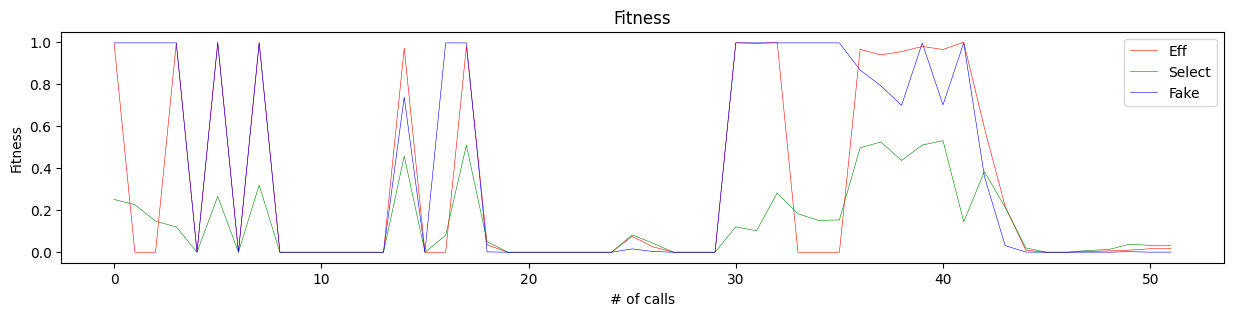

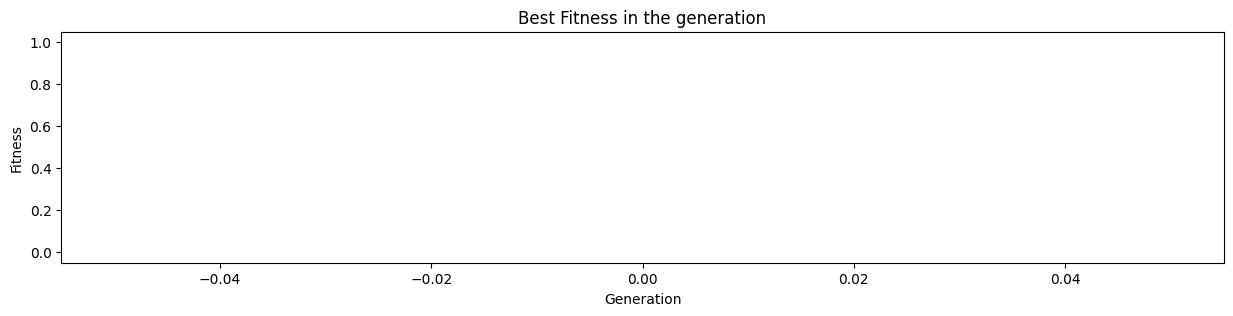

In [31]:
#read the values.csv
df = pd.read_csv('values_ga_100k.csv')

# df = pd.read_csv('ga_0_01_negfitn.csv')
# df = pd.read_csv('ga_0_1_posfitness.csv')



plt.figure(figsize=(15,3))
plt.plot(df['fitnessEff'], 'r-', linewidth = 0.4, label = 'Eff')
plt.plot(df['fitnessSel'], 'g-', linewidth = 0.4, label = 'Select')
plt.plot(((1/df['fitnessFake']) -1e6), 'b-', linewidth = 0.4, label = 'Fake')
plt.legend()
plt.title('Fitness')
plt.xlabel('# of calls')
plt.ylabel('Fitness')
plt.show()


#save the best fitness in the generation and also the parameters for the best fitness
best_params = []
best_generat = []
best_sel = []
best_fake = []

pop_fit = []
pop_fit_sel = []
pop_fit_fake = []

j = 0
for i in range(len(df['fitnessEff'])):
    j = j + 1
    pop_fit.append(df['fitnessEff'][i])
    pop_fit_sel.append(df['fitnessSel'][i])
    pop_fit_fake.append(df['fitnessFake'][i])
    best_params.append(df.iloc[i, 0:12])

    if j == population_size:
        best_generat.append(np.max(pop_fit))
        best_sel.append(np.max(pop_fit_sel))
        best_fake.append(np.min(pop_fit_fake))
        j = 0
        pop_fit = []
        pop_fit_sel = []
        pop_fit_fake = []
        best_params = []

#plot the best fitness in the generation
plt.figure(figsize=(15,3))
plt.plot(best_generat, 'b-')
plt.plot(best_sel, 'g-')
plt.plot(best_fake, 'r-')
plt.title('Best Fitness in the generation')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.show()


In [45]:
import subprocess
import re

def run_SNN(N_ev, tau_m, tau_s, tau_r, tau_plus, tau_minus, a_plus, a_minus, CFI0, CF01, CFI1, alpha, TH0, TH1):
    try:
        command = f'./SNNT13.out --N_ev {N_ev} --tau_m {tau_m} --tau_s {tau_s} --tau_r {tau_r} --tau_plus {tau_plus} --tau_minus {tau_minus} --a_plus {a_plus} --a_minus {a_minus} --CFI0 {CFI0} --CF01 {CF01} --CFI1 {CFI1} --alpha {alpha} --TH0 {TH0} --TH1 {TH1}'
        process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT, text=True)
        
        values = {
            'Eff': 0,
            'Fr': 0,
            'Q': 0,
            'Selectivity': 0,
        }

        for line in iter(process.stdout.readline, ''):
            line = line.strip()
            if 'Average efficiency:' in line:
                match = re.search(r'Average efficiency: (\d+\.?\d*)', line)
                if match:
                    values['Eff'] = float(match.group(1))
                else:
                    values['Eff'] = 0
                    
            elif 'Average fake rate:' in line:
                match = re.search(r'Average fake rate: (\d+\.?\d*)', line)
                if match:
                    values['Fr'] = float(match.group(1))
            elif 'Maximum Q value:' in line:
                match = re.search(r'Maximum Q value: (\d+\.?\d*)', line)
                if match:
                    values['Q'] = float(match.group(1))
            elif 'L1 selectivity:' in line:
                match = re.search(r'L1 selectivity: (\d+\.?\d*)', line)
                if match:
                    values['Selectivity'] = float(match.group(1))
        
        process.stdout.close()
        process.wait()
        
        return values
    
    except Exception as e:
        print(f"Error during the execution of SNN: {e}")
        return None

{'Eff': 0, 'Fr': 0, 'Q': 0, 'Selectivity': 0}